# General Data Preparation


In [ ]:
#!/usr/bin/env python3
# Download the 56 zip files in Images_png in batches
import urllib.request

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading'+fn+'...')
    urllib.request.urlretrieve(link, fn)  # download the zip file

print("Download complete. Please check the checksums")

downloadingimages_01.tar.gz...
downloadingimages_02.tar.gz...
downloadingimages_03.tar.gz...
downloadingimages_04.tar.gz...
downloadingimages_05.tar.gz...
downloadingimages_06.tar.gz...


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/images_12.tar.gz /content/drive/MyDrive/code/image_compressed/

# General Data Preprocessing

In [ ]:
# Extract the downloaded tar.gz files from gdrive
import tarfile
for idx in range(1, 13):
    fn = '/content/drive/MyDrive/uni/code/image_compressed/images_%02d.tar.gz' % idx
    print('extracting '+fn+'...')
    with tarfile.open(fn, 'r:gz') as tar:
        tar.extractall('')  # extract the contents of the zip file


extracting /content/drive/MyDrive/uni/code/image_compressed/images_01.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_02.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_03.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_04.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_05.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_06.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_07.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_08.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_09.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_10.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_11.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_12.tar.gz...


In [123]:
# Load and process CSV labels for multi-label classification
import pandas as pd
import numpy as np

# Load CSV files
train_csv = "/content/drive/MyDrive/uni/code/Disease-Diagnosis-Deep-Learning/PruneCXR/miccai2023_nih-cxr-lt_labels_train.csv"
val_csv = "/content/drive/MyDrive/uni/code/Disease-Diagnosis-Deep-Learning/PruneCXR/miccai2023_nih-cxr-lt_labels_val.csv"
test_csv = "/content/drive/MyDrive/uni/code/Disease-Diagnosis-Deep-Learning/PruneCXR/miccai2023_nih-cxr-lt_labels_test.csv"

train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

print(f"Train dataset: {len(train_df)} images")
print(f"Validation dataset: {len(val_df)} images")
print(f"Test dataset: {len(test_df)} images")

# Get disease class names (exclude 'id' and 'subj_id' columns)
label_columns = [col for col in train_df.columns if col not in ['id', 'subj_id']]
num_classes = len(label_columns)

print(f"\nNumber of disease classes: {num_classes}")
print(f"Disease classes: {label_columns}")

# Check for class imbalance
class_counts = train_df[label_columns].sum()
print(f"\nClass distribution in training set:")
for i, (disease, count) in enumerate(class_counts.items()):
    percentage = (count / len(train_df)) * 100
    print(f"{i+1:2d}. {disease:20s}: {count:5d} ({percentage:5.2f}%)")

# Show data structure
print(f"\nSample data structure:")
print(train_df.head())

# Verify data integrity
print(f"\nData integrity check:")
print(f"Missing values in train: {train_df.isnull().sum().sum()}")
print(f"Missing values in val: {val_df.isnull().sum().sum()}")
print(f"Missing values in test: {test_df.isnull().sum().sum()}")


Train dataset: 78506 images
Validation dataset: 12533 images
Test dataset: 21081 images

Number of disease classes: 20
Disease classes: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax', 'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema', 'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding']

Class distribution in training set:
 1. Atelectasis         :  7587 ( 9.66%)
 2. Cardiomegaly        :  1590 ( 2.03%)
 3. Consolidation       :  2626 ( 3.34%)
 4. Edema               :  1283 ( 1.63%)
 5. Effusion            :  7919 (10.09%)
 6. Emphysema           :  1327 ( 1.69%)
 7. Fibrosis            :  1138 ( 1.45%)
 8. Hernia              :   130 ( 0.17%)
 9. Infiltration        : 12739 (16.23%)
10. Mass                :  3689 ( 4.70%)
11. Nodule              :  4359 ( 5.55%)
12. Pleural Thickening  :  1998 ( 2.55%)
13. Pneumonia   

# Data Preprocessing for DenseNet121


Dataset Summary:
Train: 78506 images
Validation: 12533 images
Test: 21081 images
Classes: 20
Batch size: 128

Testing loaded data
Batch shape: torch.Size([128, 3, 224, 224])
Labels shape: torch.Size([128, 20])
Image range: [-2.118, 2.640]


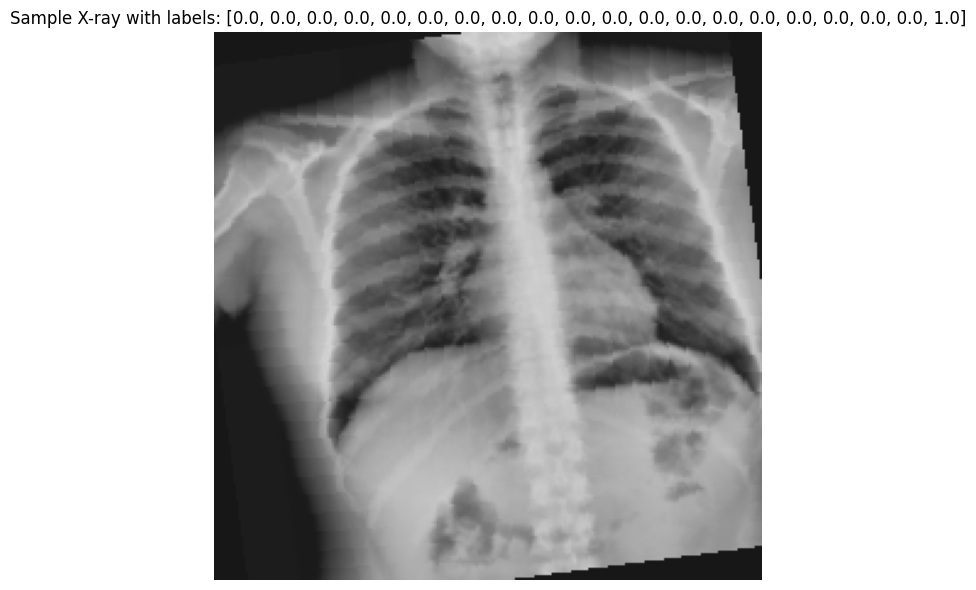

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
import os
from torchvision import transforms
import matplotlib.pyplot as plt
import cv2
import numpy as np

class ChestXrayDataset(Dataset):

    def enhance_image(self, img_path):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Apply CLAHE for local contrast enhancement
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        enhanced = clahe.apply(img)

        # Gamma correction for low brightness
        gamma = 1.2

        look_up = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
        adjusted = cv2.LUT(enhanced, look_up)

        # Convert to RGB for pretrained DenseNet
        rgb = cv2.cvtColor(adjusted, cv2.COLOR_GRAY2RGB)
        return Image.fromarray(rgb)


    def __init__(self, csv_file, image_dir, transform=None):
        self.df = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform
        # Get disease columns (exclude 'id' and 'subj_id')
        self.label_columns = [col for col in self.df.columns if col not in ['id', 'subj_id']]
        self.num_classes = len(self.label_columns)
        self.class_names = self.label_columns

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # Load and process image
        img_path = os.path.join(self.image_dir, row['id'])
        try:
            # Enhance image using CLAHE, gamma correction, and RGB conversion
            image = self.enhance_image(img_path)
        except Exception as e:
            # Fallback for missing images
            print(f"Could not load {img_path}, using blank image")
            image = Image.new('RGB', (224, 224), 0)

        # Get multi-hot encoded labels
        labels = torch.tensor(row[self.label_columns].values.astype(float), dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image, labels




# Training transforms with augmentation
train_transform = transforms.Compose([
    # Resize to larger size first
    transforms.Resize((256, 256)),
    # random crop
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    # Random flip and rotation
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(10),
    # color adjustments
    transforms.ColorJitter(brightness=0.05, contrast=0.6),
    transforms.ToTensor(),
    # Normalize for DenseNet
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Validation/test transforms (no augmentation)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ChestXrayDataset(train_csv, "/content/images", transform=train_transform)
val_dataset = ChestXrayDataset(val_csv, "/content/images", transform=val_transform)
test_dataset = ChestXrayDataset(test_csv, "/content/images", transform=val_transform)

# Create data loaders
batch_size = 128
num_workers = 4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

# Print dataset information
print(f"\nDataset Summary:")
print(f"Train: {len(train_dataset)} images")
print(f"Validation: {len(val_dataset)} images")
print(f"Test: {len(test_dataset)} images")
print(f"Classes: {train_dataset.num_classes}")
print(f"Batch size: {batch_size}")

# Test data loading
print("\nTesting loaded data")
sample_images, sample_labels = next(iter(train_loader))
print(f"Batch shape: {sample_images.shape}")
print(f"Labels shape: {sample_labels.shape}")
print(f"Image range: [{sample_images.min():.3f}, {sample_images.max():.3f}]")

# Show sample image and labels
plt.figure(figsize=(8, 6))
img_to_show = sample_images[15]

# Denormalize for display
img_denorm = img_to_show * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
img_denorm = torch.clamp(img_denorm, 0, 1)

plt.imshow(img_denorm.permute(1, 2, 0))
plt.title(f"Sample X-ray with labels: {sample_labels[15].tolist()}")
plt.axis('off')
plt.tight_layout()
plt.show()



# DenseNet121 Model Creation and Training

In [ ]:
# Pretrained DenseNet-121 Model for Multi-Label Medical Image Classification

import torch
import torch.nn as nn
import torchvision.models as models

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class PretrainedDenseNet121MultiLabel(nn.Module):

    def __init__(self, num_classes=20, dropout_rate=0.5):
        super(PretrainedDenseNet121MultiLabel, self).__init__()

        # Load pretrained DenseNet-121 from ImageNet
        self.densenet = models.densenet121(pretrained=True)

        # Get the number of features from the original classifier
        num_features = self.densenet.classifier.in_features

        # Replace the classifier for multi-label classification
        self.densenet.classifier = nn.Sequential(
            nn.BatchNorm1d(num_features),
            nn.Dropout(dropout_rate),

            nn.Linear(num_features, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate * 0.7),

            # Another layer for better representation
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate * 0.5),

            # final output layer to match number of classes
            nn.Linear(512, num_classes)
        )

        self.num_classes = num_classes
        self._initialize_classifier()

    def _initialize_classifier(self):
        for module in self.densenet.classifier.modules():
            if isinstance(module, nn.Linear):
                # Xavier initialization for better gradient flow
                nn.init.xavier_normal_(module.weight)
                if module.bias is not None:
                    # for final layer
                    if module == self.densenet.classifier[-1]:
                        # Initialize with negative bias for rare diseases
                        nn.init.constant_(module.bias, -2.0)
                    else:
                        nn.init.constant_(module.bias, 0)
            elif isinstance(module, nn.BatchNorm1d):
                nn.init.constant_(module.weight, 1)
                nn.init.constant_(module.bias, 0)

    def forward(self, x):
        return self.densenet(x)

# create the pretrained model
num_classes = train_dataset.num_classes
print(f"Number of disease classes: {num_classes}")
print(f"Disease classes: {train_dataset.class_names}")

# Initialize pretrained model
pretrained_model = PretrainedDenseNet121MultiLabel(
    num_classes=num_classes,
    dropout_rate=0.5
)

# Move model to device
pretrained_model = pretrained_model.to(device)

# Print model information
total_params_pretrained = sum(p.numel() for p in pretrained_model.parameters())
trainable_params_pretrained = sum(p.numel() for p in pretrained_model.parameters() if p.requires_grad)

print(f"\nPretrained Model Information:")
print(f"Total parameters: {total_params_pretrained:,}")
print(f"Trainable parameters: {trainable_params_pretrained:,}")
print(f"Model moved to: {device}")

# test pretrained model with a sample batch
pretrained_model.eval()
with torch.no_grad():
    sample_images, sample_labels = next(iter(train_loader))
    sample_images = sample_images.to(device)
    sample_labels = sample_labels.to(device)

    outputs_pretrained = pretrained_model(sample_images)
    print(f"\nPretrained Model test:")
    print(f"Input shape: {sample_images.shape}")
    print(f"Output shape: {outputs_pretrained.shape}")
    print(f"Labels shape: {sample_labels.shape}")

# make pretrained model as active model
active_model = pretrained_model
active_model_name = "Pretrained DenseNet-121"

Using device: cuda
Number of disease classes: 20
Disease classes: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax', 'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema', 'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding']


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Pretrained Model Information:
Total parameters: 7,488,916
Trainable parameters: 7,488,916
Model moved to: cuda

Pretrained Model test:
Input shape: torch.Size([128, 3, 224, 224])
Output shape: torch.Size([128, 20])
Labels shape: torch.Size([128, 20])


In [ ]:
# Pre Training Setup for all the models

import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import hamming_loss, f1_score, precision_score, recall_score, roc_auc_score
import numpy as np
import time
from collections import defaultdict
import os
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Improved Loss Function for Low Performance
class FocalLoss(nn.Module):
    """Focal Loss for handling class imbalance in medical data"""
    def __init__(self, alpha=1, gamma=2, pos_weight=None):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.pos_weight = pos_weight

    def forward(self, inputs, targets):
        # Apply pos_weight if provided
        if self.pos_weight is not None:
            bce_loss = nn.functional.binary_cross_entropy_with_logits(
                inputs, targets, pos_weight=self.pos_weight, reduction='none'
            )
        else:
            bce_loss = nn.functional.binary_cross_entropy_with_logits(
                inputs, targets, reduction='none'
            )

        # Apply focal loss
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1-pt)**self.gamma * bce_loss

        return focal_loss.mean()


def calculate_class_weights_from_csv(train_df, label_columns, device):

    # Get class counts directly from DataFrame
    class_counts = train_df[label_columns].sum().values
    total_samples = len(train_df)
    num_classes = len(label_columns)

    print(f"Total samples: {total_samples:,}")
    print(f"Number of classes: {num_classes}")

    # Convert to torch tensor
    class_counts = torch.tensor(class_counts, dtype=torch.float32)

    # Calculate inverse frequency weights with smoothing
    weights = total_samples / (num_classes * (class_counts + 1e-6))

    # Normalize to prevent extreme values
    weights = torch.clamp(weights, min=0.1, max=10.0)

    print(f"Class weights range: [{weights.min():.3f}, {weights.max():.3f}]")

    # Show class distribution and weights
    print(f"\nClass Distribution & Weights:")
    for i, (col, count, weight) in enumerate(zip(label_columns, class_counts, weights)):
        percentage = (count / total_samples) * 100
        print(f"   {i+1:2d}. {col:20s}: {count:5.0f} samples ({percentage:5.2f}%) → weight: {weight:.3f}")

    return weights.to(device)

def calculate_metrics(outputs, targets, threshold=0.5):
    probs = torch.sigmoid(outputs).cpu().numpy()
    targets_np = targets.cpu().numpy()
    predictions = (probs >= threshold).astype(int)

    # Calculate metrics
    hamming_acc = 1 - hamming_loss(targets_np, predictions)
    f1 = f1_score(targets_np, predictions, average='macro', zero_division=0)
    precision = precision_score(targets_np, predictions, average='macro', zero_division=0)
    recall = recall_score(targets_np, predictions, average='macro', zero_division=0)

    # Exact match accuracy
    exact_match = np.mean(np.all(targets_np == predictions, axis=1))

    # AUC score
    try:
        auc = roc_auc_score(targets_np, probs, average='macro')
    except ValueError:
        auc = 0.0

    return {
        'hamming_accuracy': hamming_acc,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'exact_match': exact_match,
        'auc': auc
    }


# Calculate class weights for imbalanced data
class_weights = calculate_class_weights_from_csv(train_df, label_columns, device)

# using Focal Loss instead of BCEwithLogitsLoss
criterion = FocalLoss(alpha=1, gamma=2, pos_weight=class_weights)

# Loss function with class balancing BCEWithLogitsLoss
# criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights)

# AdamW with weight decay
if hasattr(active_model, 'densenet'):
    # Pretrained model: lower LR for features, higher for classifier
    optimizer = optim.AdamW([
        {'params': active_model.densenet.features.parameters(), 'lr': 0.0001, 'weight_decay': 1e-4},
        {'params': active_model.densenet.classifier.parameters(), 'lr': 0.001, 'weight_decay': 1e-3},
    ], weight_decay=1e-4)
    print("Using differential learning rates: 0.0001 (features), 0.001 (classifier)")
else:
    # Custom model: single learning rate
    optimizer = optim.AdamW(active_model.parameters(), lr=0.0001, weight_decay=1e-4)
    print("Using single learning rate: 0.0001")

# Learning rate scheduler
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=5, T_mult=2)

# Create checkpoint directory
os.makedirs('checkpoints', exist_ok=True)

print("Pre training setup complete!")

Using device: cuda
Total samples: 78,506
Number of classes: 20
Class weights range: [0.100, 10.000]

Class Distribution & Weights:
    1. Atelectasis         :  7587 samples ( 9.66%) → weight: 0.517
    2. Cardiomegaly        :  1590 samples ( 2.03%) → weight: 2.469
    3. Consolidation       :  2626 samples ( 3.34%) → weight: 1.495
    4. Edema               :  1283 samples ( 1.63%) → weight: 3.059
    5. Effusion            :  7919 samples (10.09%) → weight: 0.496
    6. Emphysema           :  1327 samples ( 1.69%) → weight: 2.958
    7. Fibrosis            :  1138 samples ( 1.45%) → weight: 3.449
    8. Hernia              :   130 samples ( 0.17%) → weight: 10.000
    9. Infiltration        : 12739 samples (16.23%) → weight: 0.308
   10. Mass                :  3689 samples ( 4.70%) → weight: 1.064
   11. Nodule              :  4359 samples ( 5.55%) → weight: 0.901
   12. Pleural Thickening  :  1998 samples ( 2.55%) → weight: 1.965
   13. Pneumonia           :   806 samples ( 1.03%) 

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
# Training Loop
import os
import matplotlib.pyplot as plt

def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    all_outputs, all_targets = [], []

    for batch_idx, (images, targets) in enumerate(dataloader):
        images, targets = images.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        all_outputs.append(outputs.detach())
        all_targets.append(targets.detach())

        if batch_idx % 50 == 0:
            print(f"Batch {batch_idx}/{len(dataloader)}, Loss: {loss.item():.4f}")

    # Calculate epoch metrics
    epoch_outputs = torch.cat(all_outputs, dim=0)
    epoch_targets = torch.cat(all_targets, dim=0)
    metrics = calculate_metrics(epoch_outputs, epoch_targets)

    return running_loss / len(dataloader), metrics

def validate_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_outputs, all_targets = [], []

    with torch.no_grad():
        for images, targets in dataloader:
            images, targets = images.to(device), targets.to(device)
            outputs = model(images)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            all_outputs.append(outputs)
            all_targets.append(targets)

    # Calculate epoch metrics
    epoch_outputs = torch.cat(all_outputs, dim=0)
    epoch_targets = torch.cat(all_targets, dim=0)
    metrics = calculate_metrics(epoch_outputs, epoch_targets)

    return running_loss / len(dataloader), metrics

# Training configuration
num_epochs = 15
best_val_loss = float('inf')
patience_counter = 0
early_stopping_patience = 8

# Create checkpoint directory
os.makedirs('checkpoints', exist_ok=True)

# Training history
train_losses, validate_losses = [], []
train_metrics_history = defaultdict(list)
validate_metrics_history = defaultdict(list)
learning_rates = []

print(f"Training for {num_epochs} epochs with early stopping (patience: {early_stopping_patience})")
print(f"Device: {device}")

# Main training loop
start_time = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 50)

    # Training phase
    print("Training Phase")
    train_loss, train_metrics = train_epoch(active_model, train_loader, criterion, optimizer, device)

    # Validation phase
    print("Validation Phase")
    validate_loss, validate_metrics = validate_epoch(active_model, val_loader, criterion, device)

    # Update learning rate
    scheduler.step(validate_loss)
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)

    # Store metrics
    train_losses.append(train_loss)
    validate_losses.append(validate_loss)
    for key, value in train_metrics.items():
        train_metrics_history[key].append(value)
    for key, value in validate_metrics.items():
        validate_metrics_history[key].append(value)

    # Print epoch results
    epoch_time = time.time() - epoch_start
    print(f"\nEpoch {epoch+1} Results ({epoch_time:.1f}s):")
    print(f" Train Loss: {train_loss:.4f} | Validate Loss: {validate_loss:.4f}")
    print(f" Train F1: {train_metrics['f1_score']:.4f} | Validate F1: {validate_metrics['f1_score']:.4f}")
    print(f" Train Acc: {train_metrics['hamming_accuracy']:.4f} | Validate Acc: {validate_metrics['hamming_accuracy']:.4f}")
    print(f" Learning Rate: {current_lr:.6f}")

    # Save best model
    if validate_loss < best_val_loss:
        best_val_loss = validate_loss
        patience_counter = 0

        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': active_model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'train_loss': train_loss,
            'validate_loss': validate_loss,
            'train_metrics': train_metrics,
            'validate_metrics': validate_metrics,
            'best_validate_loss': best_val_loss,
            'model_name': active_model_name,
        }, f'checkpoints/best_{active_model_name.lower().replace(" ", "_").replace("-", "_")}.pth')

        print(f"  Best model saved! Validate Loss: {validate_loss:.4f}")
    else:
        patience_counter += 1
        print(f"No improvement. Patience: {patience_counter}/{early_stopping_patience}")

    # Early stopping
    if patience_counter >= early_stopping_patience:
        print(f"\nEarly stopping after {epoch+1} epochs")
        break

total_time = time.time() - start_time
print(f"\nTraining completed in {total_time/60:.1f} minutes")
print(f"Best validation loss: {best_val_loss:.4f}")
print(f"Total epochs: {len(train_losses)}")

Training for 15 epochs with early stopping (patience: 8)
Device: cuda

Epoch 1/15
--------------------------------------------------
Training Phase
Batch 0/614, Loss: 0.1873
Batch 50/614, Loss: 0.2285
Batch 100/614, Loss: 0.1856
Batch 150/614, Loss: 0.1597
Batch 200/614, Loss: 0.1494
Batch 250/614, Loss: 0.2294
Batch 300/614, Loss: 0.1689
Batch 350/614, Loss: 0.1639
Batch 400/614, Loss: 0.2512
Batch 450/614, Loss: 0.1805
Batch 500/614, Loss: 0.1795
Batch 550/614, Loss: 0.1429
Batch 600/614, Loss: 0.2167
Validation Phase

Epoch 1 Results (810.3s):
 Train Loss: 0.1703 | Validate Loss: 0.1752
 Train F1: 0.0048 | Validate F1: 0.0148
 Train Acc: 0.9386 | Validate Acc: 0.9342
 Learning Rate: 0.000100
  Best model saved! Validate Loss: 0.1752

Epoch 2/15
--------------------------------------------------
Training Phase
Batch 0/614, Loss: 0.1552
Batch 50/614, Loss: 0.1849
Batch 100/614, Loss: 0.1363
Batch 150/614, Loss: 0.1821
Batch 200/614, Loss: 0.1702
Batch 250/614, Loss: 0.1561
Batch 300/6

Generating training results visualization


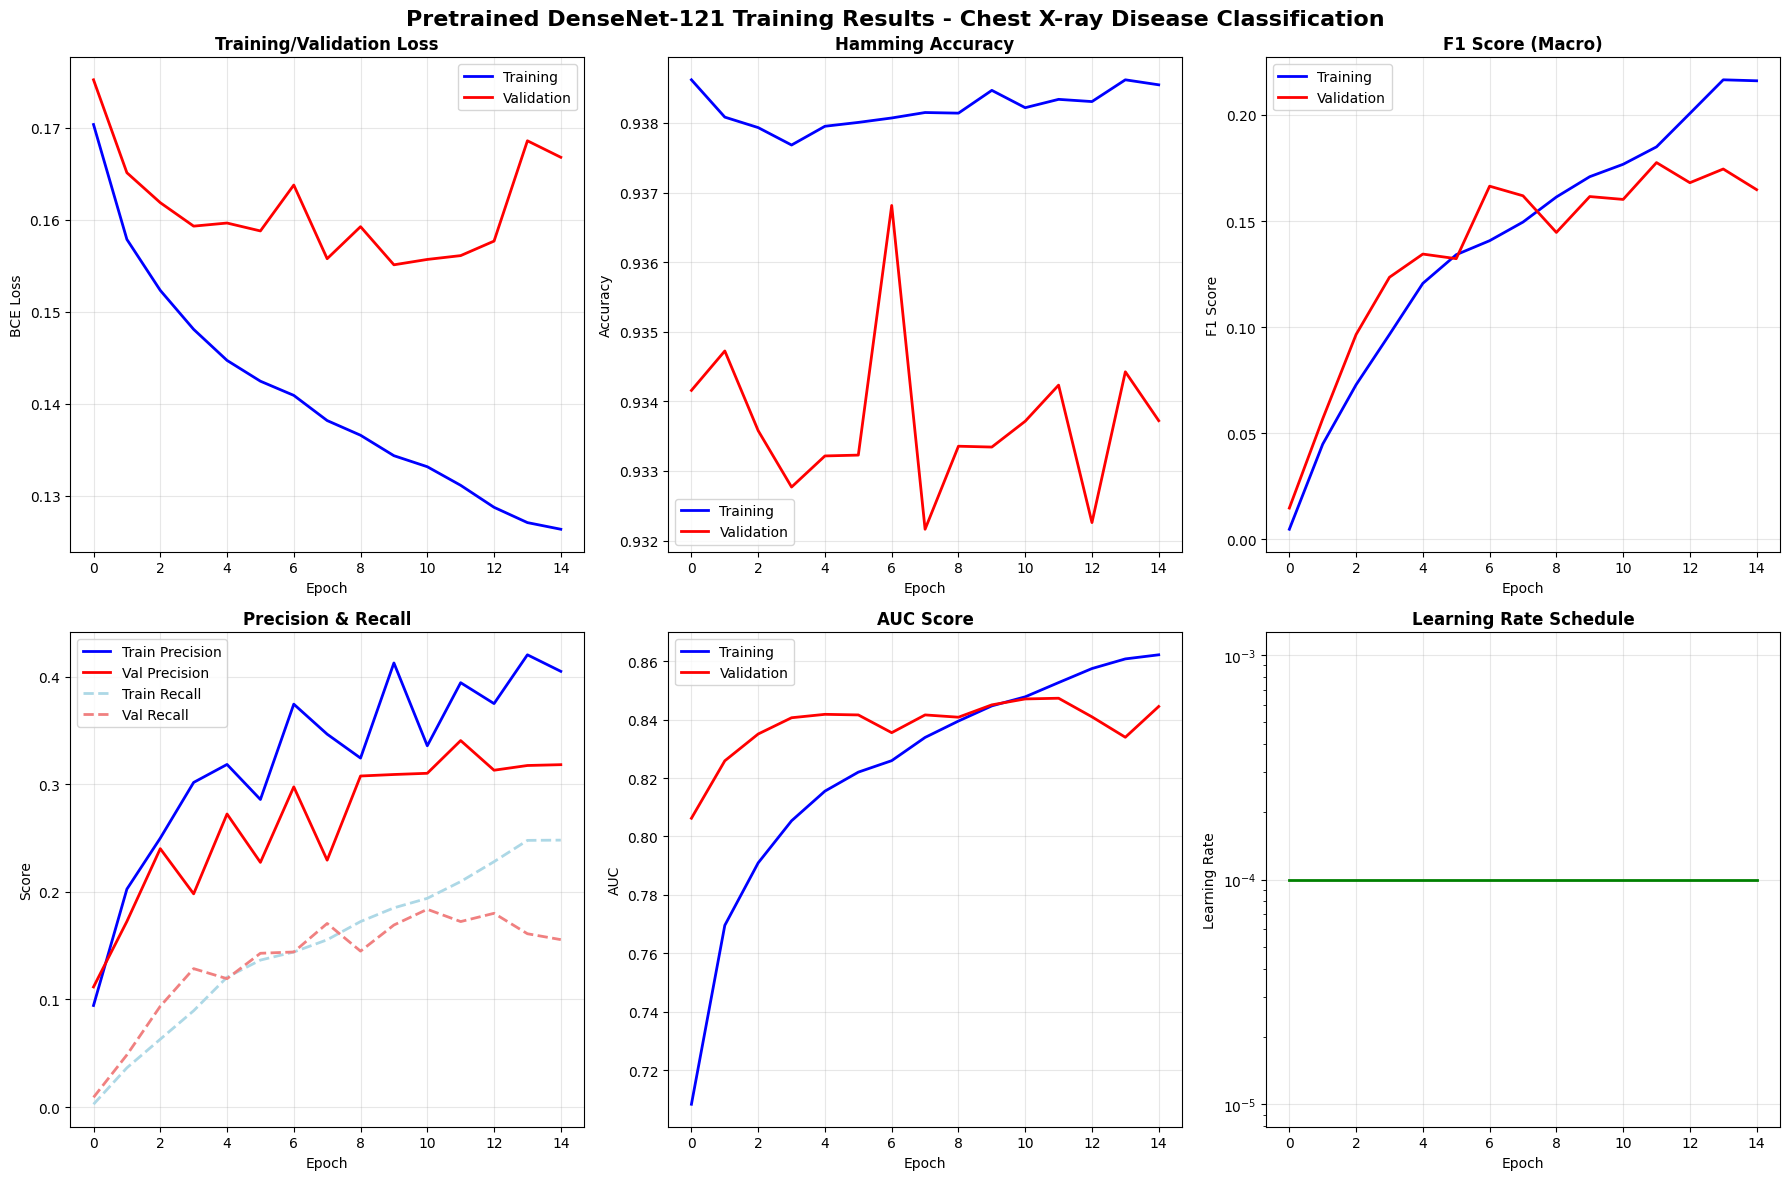

FINAL TRAINING SUMMARY
--------------------------------------------------------------------------------
 Model Performance:
  Best Validation Loss    : 0.1551
  Final Training Loss     : 0.1264
  Final Validation Loss   : 0.1668
  Final Val Hamming Acc   : 0.9337
  Final Val F1 Score      : 0.1648
  Final Val Precision     : 0.3181
  Final Val Recall        : 0.1556
  Final Val AUC           : 0.8445

Training Configuration:
  Model                   : Pretrained DenseNet-121
  Total Parameters        : 7,488,916
  Training Epochs         : 15
  Dataset Size            : 78,506 train / 12,533 val
  Batch Size              : 128
  Final Learning Rate     : 0.000100

Model Checkpoint:
Saved as: checkpoints/best_pretrained_densenet_121.pth


In [ ]:
# Training Results Visualization and Summary
import matplotlib.pyplot as plt

print("Generating training results visualization")

# Create comprehensive training plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f'{active_model_name} Training Results - Chest X-ray Disease Classification',
             fontsize=16, fontweight='bold')

# 1. Loss curves
axes[0, 0].plot(train_losses, label='Training', color='blue', linewidth=2)
axes[0, 0].plot(validate_losses, label='Validation', color='red', linewidth=2)
axes[0, 0].set_title('Training/Validation Loss', fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('BCE Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Hamming Accuracy
axes[0, 1].plot(train_metrics_history['hamming_accuracy'], label='Training', color='blue', linewidth=2)
axes[0, 1].plot(validate_metrics_history['hamming_accuracy'], label='Validation', color='red', linewidth=2)
axes[0, 1].set_title('Hamming Accuracy', fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. F1 Score
axes[0, 2].plot(train_metrics_history['f1_score'], label='Training', color='blue', linewidth=2)
axes[0, 2].plot(validate_metrics_history['f1_score'], label='Validation', color='red', linewidth=2)
axes[0, 2].set_title('F1 Score (Macro)', fontweight='bold')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('F1 Score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Precision and Recall
axes[1, 0].plot(train_metrics_history['precision'], label='Train Precision', color='blue', linewidth=2)
axes[1, 0].plot(validate_metrics_history['precision'], label='Val Precision', color='red', linewidth=2)
axes[1, 0].plot(train_metrics_history['recall'], label='Train Recall', color='lightblue', linewidth=2, linestyle='--')
axes[1, 0].plot(validate_metrics_history['recall'], label='Val Recall', color='lightcoral', linewidth=2, linestyle='--')
axes[1, 0].set_title('Precision & Recall', fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. AUC Score
axes[1, 1].plot(train_metrics_history['auc'], label='Training', color='blue', linewidth=2)
axes[1, 1].plot(validate_metrics_history['auc'], label='Validation', color='red', linewidth=2)
axes[1, 1].set_title('AUC Score', fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('AUC')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Learning Rate Schedule
axes[1, 2].plot(learning_rates, color='green', linewidth=2)
axes[1, 2].set_title('Learning Rate Schedule', fontweight='bold')
axes[1, 2].set_xlabel('Epoch')
axes[1, 2].set_ylabel('Learning Rate')
axes[1, 2].set_yscale('log')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Training Summary

print("FINAL TRAINING SUMMARY")
print(f"{'-'*80}")

# Get final metrics
final_train_loss = train_losses[-1]
final_validate_loss = validate_losses[-1]
final_train_metrics = {k: v[-1] for k, v in train_metrics_history.items()}
final_validate_metrics = {k: v[-1] for k, v in validate_metrics_history.items()}

print(f" Model Performance:")
print(f"  Best Validation Loss    : {best_val_loss:.4f}")
print(f"  Final Training Loss     : {final_train_loss:.4f}")
print(f"  Final Validation Loss   : {final_validate_loss:.4f}")
print(f"  Final Val Hamming Acc   : {final_validate_metrics['hamming_accuracy']:.4f}")
print(f"  Final Val F1 Score      : {final_validate_metrics['f1_score']:.4f}")
print(f"  Final Val Precision     : {final_validate_metrics['precision']:.4f}")
print(f"  Final Val Recall        : {final_validate_metrics['recall']:.4f}")
print(f"  Final Val AUC           : {final_validate_metrics['auc']:.4f}")

print(f"\nTraining Configuration:")
print(f"  Model                   : {active_model_name}")
print(f"  Total Parameters        : {sum(p.numel() for p in active_model.parameters()):,}")
print(f"  Training Epochs         : {len(train_losses)}")
print(f"  Dataset Size            : {len(train_dataset):,} train / {len(val_dataset):,} val")
print(f"  Batch Size              : {batch_size}")
print(f"  Final Learning Rate     : {learning_rates[-1]:.6f}")

print(f"\nModel Checkpoint:")
checkpoint_name = f"best_{active_model_name.lower().replace(' ', '_').replace('-', '_')}.pth"
print(f"Saved as: checkpoints/{checkpoint_name}")


# DenseNet121 Model Evaluation

Basic evaluation of the DenseNet model with Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.

In [ ]:
# Model Evaluation and Testing
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate model on test set
def model_evaluation(model, test_loader, device):
    model.eval()
    all_predictions = []
    all_targets = []

    print("Evaluating model on test set...")
    with torch.no_grad():
        for batch_idx, (images, targets) in enumerate(test_loader):
            images, targets = images.to(device), targets.to(device)

            # Get model predictions
            outputs = model(images)
            probabilities = torch.sigmoid(outputs)
            predictions = (probabilities >= 0.5).float()

            all_predictions.append(predictions.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

            if batch_idx % 10 == 0:
                print(f"Processing batch {batch_idx}/{len(test_loader)}")

    # Combine all predictions and targets
    y_pred = np.vstack(all_predictions)
    y_true = np.vstack(all_targets)

    return y_true, y_pred

# Run evaluation
print(f"Using model: {active_model.__class__.__name__}")
print(f"Model name: {active_model_name}")
print(f"Test set size: {len(test_dataset)} images")
print(f"Number of classes: {num_classes}")

y_true, y_pred = model_evaluation(active_model, test_loader, device)

print(f"Predictions shape: {y_pred.shape}")
print(f"Targets shape: {y_true.shape}")

Using model: PretrainedDenseNet121MultiLabel
Model name: Pretrained DenseNet-121
Test set size: 21081 images
Number of classes: 20
Evaluating model on test set...
Processing batch 0/165
Processing batch 10/165
Processing batch 20/165
Processing batch 30/165
Processing batch 40/165
Processing batch 50/165
Processing batch 60/165
Processing batch 70/165
Processing batch 80/165
Processing batch 90/165
Processing batch 100/165
Processing batch 110/165
Processing batch 120/165
Processing batch 130/165
Processing batch 140/165
Processing batch 150/165
Processing batch 160/165
Predictions shape: (21081, 20)
Targets shape: (21081, 20)


In [ ]:
print("Calculating metrics")

# Accuracy (Hamming accuracy for multi-label)
hamming_accuracy = 1 - np.mean(np.not_equal(y_true, y_pred))

# Precision, Recall, F1 (macro average)
precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

# Display results
print(f"\nOVERALL PERFORMANCE:")
print(f"{'-'*80}")
print(f"Accuracy (Hamming):  {hamming_accuracy:.4f}")
print(f"Precision (Macro):   {precision:.4f}")
print(f"Recall (Macro):      {recall:.4f}")
print(f"F1-Score (Macro):    {f1:.4f}")

# Per-class metrics
print(f"\nPER-CLASS METRICS:")
print(f"{'Class':<20} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print(f"{'-'*60}")

class_names = label_columns
for i, class_name in enumerate(class_names):
    class_precision = precision_score(y_true[:, i], y_pred[:, i], zero_division=0)
    class_recall = recall_score(y_true[:, i], y_pred[:, i], zero_division=0)
    class_f1 = f1_score(y_true[:, i], y_pred[:, i], zero_division=0)

    print(f"{class_name:<20} {class_precision:<12.3f} {class_recall:<12.3f} {class_f1:<12.3f}")

print("\nMetrics calculation completed!")

Calculating metrics

OVERALL PERFORMANCE:
--------------------------------------------------------------------------------
Accuracy (Hamming):  0.9242
Precision (Macro):   0.3004
Recall (Macro):      0.1612
F1-Score (Macro):    0.1620

PER-CLASS METRICS:
Class                Precision    Recall       F1-Score    
------------------------------------------------------------
Atelectasis          0.000        0.000        0.000       
Cardiomegaly         0.451        0.241        0.314       
Consolidation        0.000        0.000        0.000       
Edema                0.186        0.181        0.183       
Effusion             0.670        0.095        0.166       
Emphysema            0.493        0.467        0.479       
Fibrosis             0.128        0.014        0.025       
Hernia               0.392        0.500        0.440       
Infiltration         0.000        0.000        0.000       
Mass                 0.513        0.122        0.197       
Nodule               0.5

Generating confusion matrices


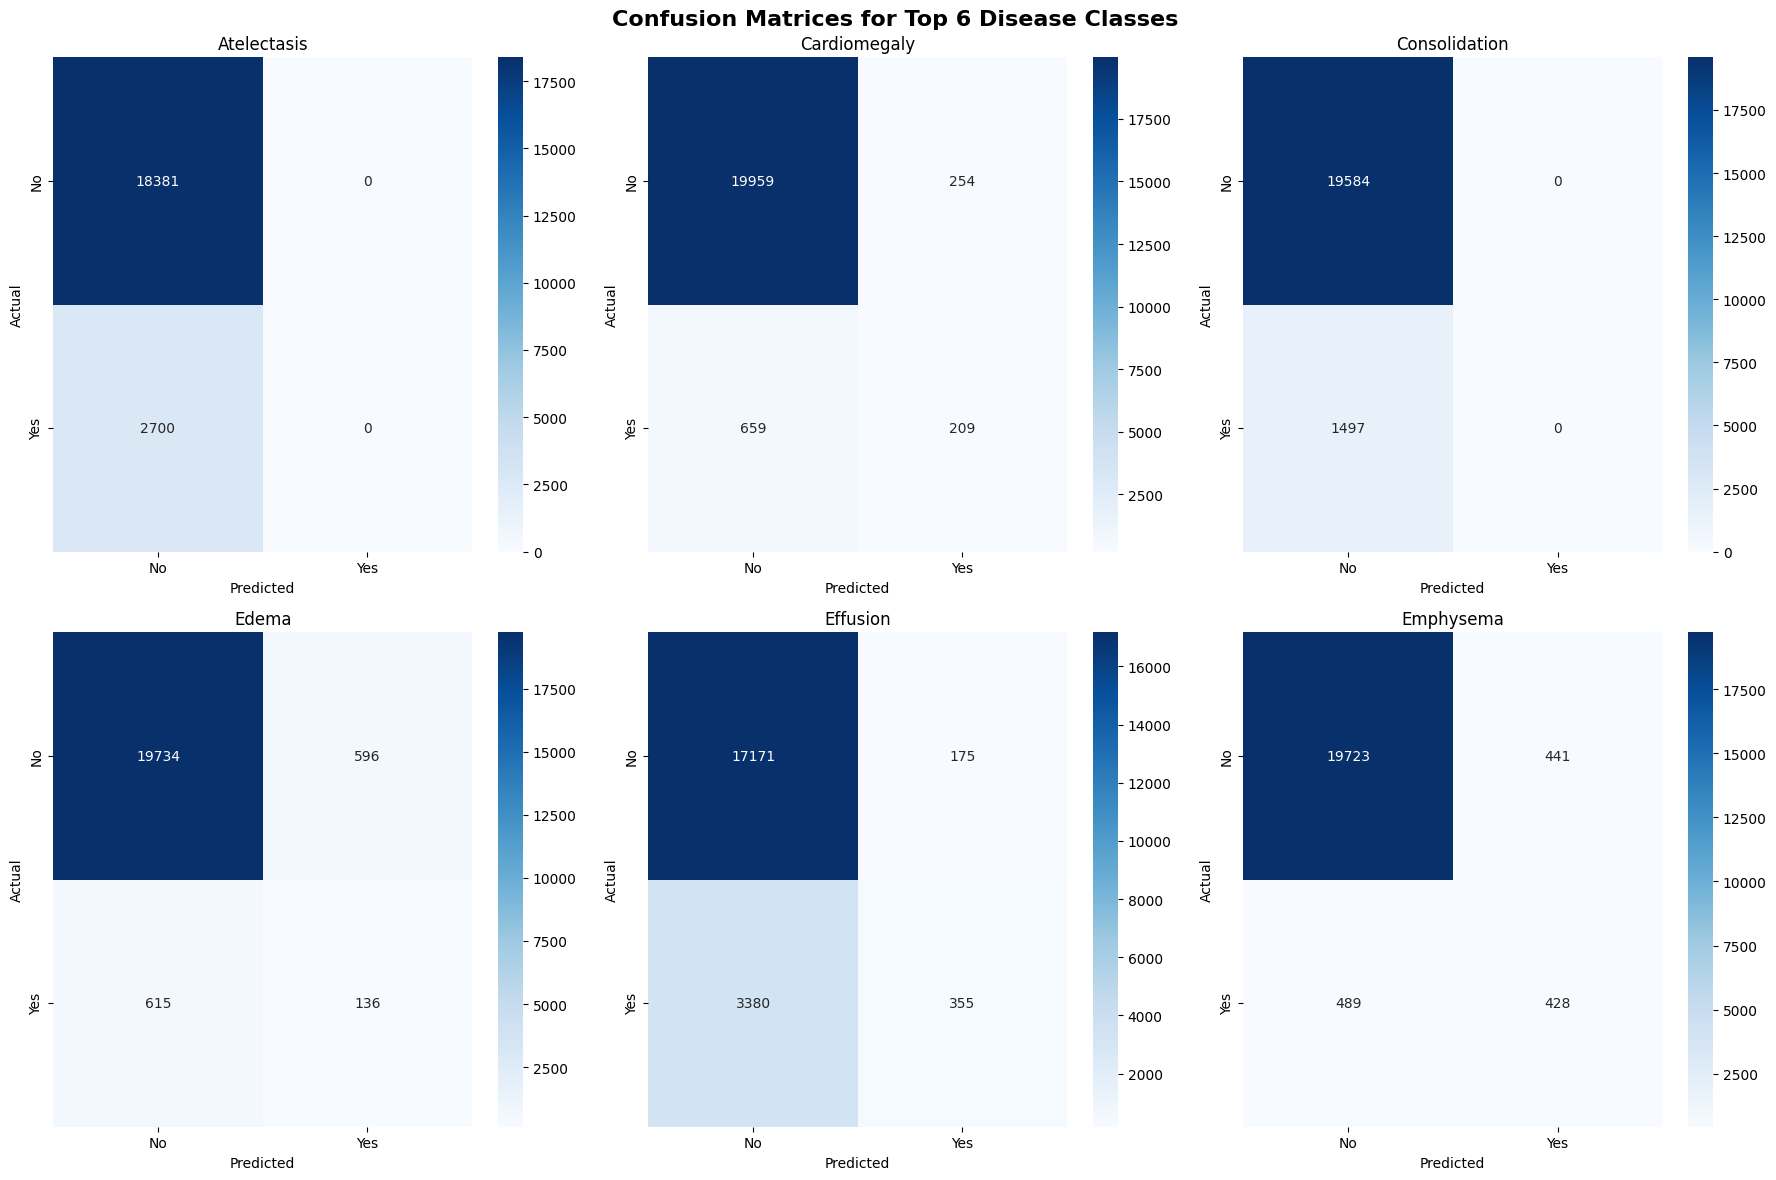


CONFUSION MATRIX SUMMARY:
----------------------------------------------------------------------
Class                TN       FP       FN       TP      
----------------------------------------------------------------------
Atelectasis          18381    0        2700     0       
Cardiomegaly         19959    254      659      209     
Consolidation        19584    0        1497     0       
Edema                19734    596      615      136     
Effusion             17171    175      3380     355     
Emphysema            19723    441      489      428     
Fibrosis             20682    34       360      5       
Hernia               20971    48       31       31      
Infiltration         15922    0        5159     0       
Mass                 19598    154      1167     162     
Nodule               19774    2        1303     2       
Pleural Thickening   20179    0        902      0       
Pneumonia            20629    0        452      0       
Pneumothorax         18925    50 

In [ ]:
# Confusion Matrix Visualization
checkpoint_path = f'checkpoints/best_{active_model_name.lower().replace(" ", "_").replace("-", "_")}.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
active_model.load_state_dict(checkpoint['model_state_dict'])
# Overall confusion matrix statistics
print(f"\nCONFUSION MATRIX SUMMARY:")
print(f"{'-'*70}")
print(f"{'Class':<20} {'TN':<8} {'FP':<8} {'FN':<8} {'TP':<8}")
print(f"{'-'*70}")

for i, class_name in enumerate(class_names):
    cm = confusion_matrix(y_true[:, i], y_pred[:, i])
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
    else:
        # Handle cases where only one class is present
        if cm.shape == (1, 1):
            if np.all(y_true[:, i] == 0):  # Only negative examples
                tn, fp, fn, tp = cm[0, 0], 0, 0, 0
            else:  # Only positive examples
                tn, fp, fn, tp = 0, 0, 0, cm[0, 0]
        else:
            tn, fp, fn, tp = 0, 0, 0, 0

    print(f"{class_name:<20} {tn:<8d} {fp:<8d} {fn:<8d} {tp:<8d}")

print("\nConfusion matrix analysis completed!")

Save DenseNet121 model to gcloud

In [ ]:
!cp /content/checkpoints/best_pretrained_densenet_121.pth /content/drive/MyDrive/uni/code/Disease-Diagnosis-Deep-Learning/checkpoints

# Data Preprocessing for Custom CNN Model


Dataset Summary:
Train: 78506 images
Validation: 12533 images
Test: 21081 images
Classes: 20
Batch size: 128

Testing loaded data


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch shape: torch.Size([128, 1, 224, 224])
Labels shape: torch.Size([128, 20])
Image range: [-0.447, 1.007]


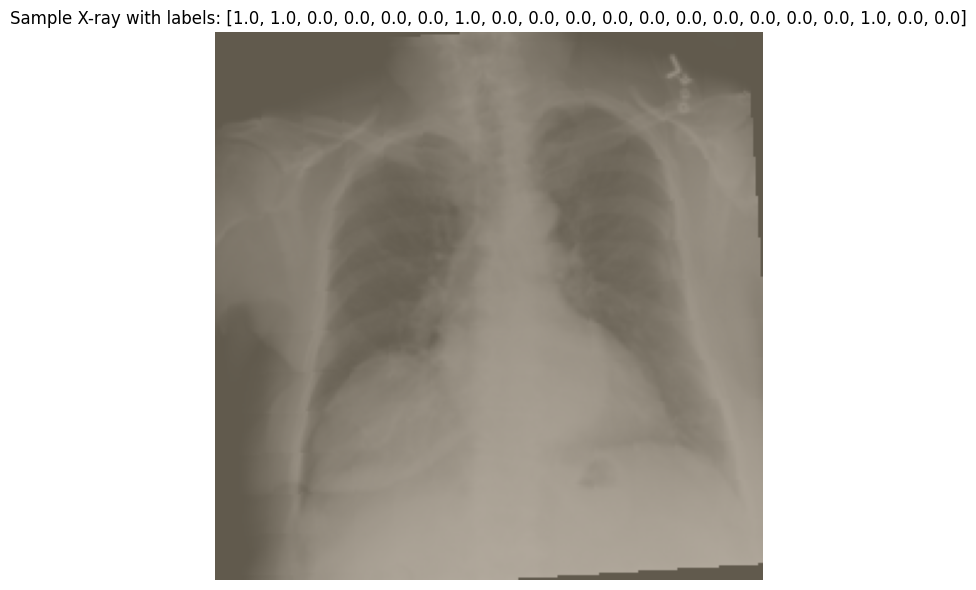

In [192]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
import os
from torchvision import transforms
import matplotlib.pyplot as plt
import cv2
import numpy as np

class ChestXrayDataset(Dataset):

    def enhance_image(self, img_path):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Apply CLAHE for local contrast enhancement
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        enhanced = clahe.apply(img)

        # Gamma correction for low brightness
        gamma = 1.2

        look_up = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
        adjusted = cv2.LUT(enhanced, look_up)

        # Convert to RGB for pretrained DenseNet
        rgb = cv2.cvtColor(adjusted, cv2.COLOR_GRAY2RGB)
        return Image.fromarray(rgb)


    def __init__(self, csv_file, image_dir, transform=None):
        self.df = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform
        # Get disease columns (exclude 'id' and 'subj_id')
        self.label_columns = [col for col in self.df.columns if col not in ['id', 'subj_id']]
        self.num_classes = len(self.label_columns)
        self.class_names = self.label_columns

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # Load and process image
        img_path = os.path.join(self.image_dir, row['id'])
        try:
            # Enhance image using CLAHE, gamma correction, and RGB conversion
            # image = self.enhance_image(img_path)
            image = Image.open(img_path).convert('L')
        except Exception as e:
            # Fallback for missing images
            print(f"Could not load {img_path}, using blank image")
            image = Image.new('L', (224, 224), 0)

        # Get multi-hot encoded labels
        labels = torch.tensor(row[self.label_columns].values.astype(float), dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image, labels




# Training transforms with augmentation
train_transform = transforms.Compose([
    # Resize to larger size first
    transforms.Resize((256, 256)),
    # random crop
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    # Random flip and rotation
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(10),
    # color adjustments
    transforms.ToTensor(),
    # Normalize for DenseNet
    transforms.Normalize(mean=[0.306], std=[0.685]),
])

# Validation/test transforms (no augmentation)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = ChestXrayDataset(train_csv, "/content/images", transform=train_transform)
val_dataset = ChestXrayDataset(val_csv, "/content/images", transform=val_transform)
test_dataset = ChestXrayDataset(test_csv, "/content/images", transform=val_transform)

# Create data loaders
batch_size = 128
num_workers = 50

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

# Print dataset information
print(f"\nDataset Summary:")
print(f"Train: {len(train_dataset)} images")
print(f"Validation: {len(val_dataset)} images")
print(f"Test: {len(test_dataset)} images")
print(f"Classes: {train_dataset.num_classes}")
print(f"Batch size: {batch_size}")

# Test data loading
print("\nTesting loaded data")
sample_images, sample_labels = next(iter(train_loader))
print(f"Batch shape: {sample_images.shape}")
print(f"Labels shape: {sample_labels.shape}")
print(f"Image range: [{sample_images.min():.3f}, {sample_images.max():.3f}]")

# Show sample image and labels
plt.figure(figsize=(8, 6))
img_to_show = sample_images[57]

# Denormalize for display
img_denorm = img_to_show * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
img_denorm = torch.clamp(img_denorm, 0, 1)

plt.imshow(img_denorm.permute(1, 2, 0))
plt.title(f"Sample X-ray with labels: {sample_labels[57].tolist()}")
plt.axis('off')
plt.tight_layout()
plt.show()



# Custom CNN Model Creation and Training

In [193]:
# custom cnn model for multi-label classification

import torch
import torch.nn as nn

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class CustomMultiLabelCNN(nn.Module):
    def __init__(self, num_classes=20, input_channels=1, dropout_rate=0.3):
        super(CustomMultiLabelCNN, self).__init__()

        self.input_channels = input_channels

        self.features = nn.Sequential(
            # Block 1 initial kernel setup
            nn.Conv2d(input_channels, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),

            # Block 2 enhanced feature maps
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3 deep feature extraction
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4 High level features
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # Attention mechanism for medical images
        self.attention = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 512),
            nn.Sigmoid()
        )

        # Classifier layer
        self.classifier = nn.Sequential(
           nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate/2),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate/2),
            nn.Linear(256, num_classes)
        )
        self._initialize_weights()

    def _initialize_weights(self):
       for module in self.modules():
            if isinstance(module, nn.Conv2d):
                # Kaimin initialization for c layers
                nn.init.kaiming_normal_(module.weight, mode='fan_out', nonlinearity='relu')
                if module.bias is not None:
                    nn.init.constant_(module.bias, 0)
            elif isinstance(module, nn.BatchNorm2d) or isinstance(module, nn.BatchNorm1d):
                nn.init.constant_(module.weight, 1)
                nn.init.constant_(module.bias, 0)
            elif isinstance(module, nn.Linear):
                # Xavier initialization
                nn.init.xavier_normal_(module.weight)
                if module.bias is not None:
                    if module == self.classifier[-1]:
                        nn.init.constant_(module.bias, -0.5)
                    else:
                        nn.init.constant_(module.bias, 0)

    def forward(self, x):
        features = self.features(x)

        # Apply attention mechanism
        attention_weights = self.attention(features).unsqueeze(-1).unsqueeze(-1)
        attended_features = features * attention_weights

        # Classify
        output = self.classifier(attended_features)
        return output


# Create the custom model
num_classes = train_dataset.num_classes
print(f"Number of disease classes: {num_classes}")
print(f"Disease classes: {train_dataset.class_names}")

# Initialize custom model
custom_model = CustomMultiLabelCNN(
    num_classes=num_classes,
    input_channels=1,
    dropout_rate=0.3
)

# Move model to device
custom_model = custom_model.to(device)

# Print model information
total_params_custom = sum(p.numel() for p in custom_model.parameters())
trainable_params_custom = sum(p.numel() for p in custom_model.parameters() if p.requires_grad)

print(f"\Custom Model Information:")
print(f"Total parameters: {total_params_custom:,}")
print(f"Trainable parameters: {trainable_params_custom:,}")
print(f"Model moved to: {device}")

# Test custom model with a sample batch
custom_model.eval()
with torch.no_grad():
    sample_images, sample_labels = next(iter(train_loader))
    sample_images = sample_images.to(device)
    sample_labels = sample_labels.to(device)

    outputs_custom = custom_model(sample_images)
    print(f"\Custom Model test:")
    print(f"Input shape: {sample_images.shape}")
    print(f"Output shape: {outputs_custom.shape}")
    print(f"Labels shape: {sample_labels.shape}")

active_model = custom_model
active_model_name = "Custom CNN"

Using device: cuda
Number of disease classes: 20
Disease classes: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax', 'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema', 'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding']
\Custom Model Information:
Total parameters: 6,106,644
Trainable parameters: 6,106,644
Model moved to: cuda
\Custom Model test:
Input shape: torch.Size([128, 1, 224, 224])
Output shape: torch.Size([128, 20])
Labels shape: torch.Size([128, 20])


Same Code for the Custom CNN model

In [195]:
# Pre Training Setup for all the models

import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import hamming_loss, f1_score, precision_score, recall_score, roc_auc_score
import numpy as np
import time
from collections import defaultdict
import os

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

def calculate_class_weights_from_csv(train_df, label_columns, device):

    # Get class counts directly from DataFrame
    class_counts = train_df[label_columns].sum().values
    total_samples = len(train_df)
    num_classes = len(label_columns)

    print(f"Total samples: {total_samples:,}")
    print(f"Number of classes: {num_classes}")

    # Convert to torch tensor
    class_counts = torch.tensor(class_counts, dtype=torch.float32)

    # Calculate inverse frequency weights with smoothing
    weights = total_samples / (num_classes * (class_counts + 1e-6))

    # Normalize to prevent extreme values
    weights = torch.clamp(weights, min=0.1, max=10.0)

    print(f"Class weights range: [{weights.min():.3f}, {weights.max():.3f}]")

    # Show class distribution and weights
    print(f"\nClass Distribution & Weights:")
    for i, (col, count, weight) in enumerate(zip(label_columns, class_counts, weights)):
        percentage = (count / total_samples) * 100
        print(f"   {i+1:2d}. {col:20s}: {count:5.0f} samples ({percentage:5.2f}%) → weight: {weight:.3f}")

    return weights.to(device)

def calculate_metrics(outputs, targets, threshold=0.5):
    probs = torch.sigmoid(outputs).cpu().numpy()
    targets_np = targets.cpu().numpy()
    predictions = (probs >= threshold).astype(int)

    # debug information to track predictions
    print(f"Debug: Probs range [{probs.min():.4f}, {probs.max():.4f}]")
    print(f"Debug: Positive predictions: {predictions.sum()}/{predictions.size}")
    print(f"Debug: Actual positives: {targets_np.sum()}/{targets_np.size}")

    # Calculate metrics with better handling
    hamming_acc = 1 - hamming_loss(targets_np, predictions)

    # Prediction adjustments
    if predictions.sum() == 0:
        print("No positive predictions!")
        threshold_adaptive = 0.1
        predictions_adaptive = (probs >= threshold_adaptive).astype(int)
        print(f"With threshold {threshold_adaptive}: {predictions_adaptive.sum()} positive predictions")
        predictions = predictions_adaptive

    f1 = f1_score(targets_np, predictions, average='macro', zero_division=0)
    precision = precision_score(targets_np, predictions, average='macro', zero_division=0)
    recall = recall_score(targets_np, predictions, average='macro', zero_division=0)

    # Exact match accuracy
    exact_match = np.mean(np.all(targets_np == predictions, axis=1))

    # AUC score
    try:
        auc = roc_auc_score(targets_np, probs, average='macro')
    except ValueError:
        auc = 0.0

    return {
        'hamming_accuracy': hamming_acc,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'exact_match': exact_match,
        'auc': auc
    }

# Calculate class weights for imbalanced data
class_weights = calculate_class_weights_from_csv(train_df, label_columns, device)

# Loss function with class balancing BCEWithLogitsLoss
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights)

# AdamW with weight decay
if hasattr(active_model, 'densenet'):
    # Pretrained model: lower LR for features, higher for classifier
    optimizer = optim.AdamW([
        {'params': active_model.densenet.features.parameters(), 'lr': 0.0005},
        {'params': active_model.densenet.classifier.parameters(), 'lr': 0.002}
    ], weight_decay=1e-4)
    print("Using differential learning rates: 0.0005 (features), 0.002 (classifier)")
else:
    # Custom model: single learning rate
    optimizer = optim.AdamW(active_model.parameters(), lr=0.0005, weight_decay=1e-4)
    print("Using single learning rate: 0.0005")

# Learning rate scheduler using ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.7, patience=2, verbose=True, min_lr=1e-5)

# Create checkpoint directory
os.makedirs('checkpoints', exist_ok=True)

print("Pre training setup complete!")

Using device: cuda
Total samples: 78,506
Number of classes: 20
Class weights range: [0.100, 10.000]

Class Distribution & Weights:
    1. Atelectasis         :  7587 samples ( 9.66%) → weight: 0.517
    2. Cardiomegaly        :  1590 samples ( 2.03%) → weight: 2.469
    3. Consolidation       :  2626 samples ( 3.34%) → weight: 1.495
    4. Edema               :  1283 samples ( 1.63%) → weight: 3.059
    5. Effusion            :  7919 samples (10.09%) → weight: 0.496
    6. Emphysema           :  1327 samples ( 1.69%) → weight: 2.958
    7. Fibrosis            :  1138 samples ( 1.45%) → weight: 3.449
    8. Hernia              :   130 samples ( 0.17%) → weight: 10.000
    9. Infiltration        : 12739 samples (16.23%) → weight: 0.308
   10. Mass                :  3689 samples ( 4.70%) → weight: 1.064
   11. Nodule              :  4359 samples ( 5.55%) → weight: 0.901
   12. Pleural Thickening  :  1998 samples ( 2.55%) → weight: 1.965
   13. Pneumonia           :   806 samples ( 1.03%) 

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [196]:
# Training Loop
import os
import matplotlib.pyplot as plt

def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    all_outputs, all_targets = [], []

    for batch_idx, (images, targets) in enumerate(dataloader):
        images, targets = images.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        all_outputs.append(outputs.detach())
        all_targets.append(targets.detach())

        if batch_idx % 50 == 0:
            print(f"Batch {batch_idx}/{len(dataloader)}, Loss: {loss.item():.4f}")

    # Calculate epoch metrics
    epoch_outputs = torch.cat(all_outputs, dim=0)
    epoch_targets = torch.cat(all_targets, dim=0)
    metrics = calculate_metrics(epoch_outputs, epoch_targets)

    return running_loss / len(dataloader), metrics

def validate_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_outputs, all_targets = [], []

    with torch.no_grad():
        for images, targets in dataloader:
            images, targets = images.to(device), targets.to(device)
            outputs = model(images)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            all_outputs.append(outputs)
            all_targets.append(targets)

    # Calculate epoch metrics
    epoch_outputs = torch.cat(all_outputs, dim=0)
    epoch_targets = torch.cat(all_targets, dim=0)
    metrics = calculate_metrics(epoch_outputs, epoch_targets)

    return running_loss / len(dataloader), metrics

# Training configuration
num_epochs = 10
best_val_loss = float('inf')
patience_counter = 0
early_stopping_patience = 5

# Create checkpoint directory
os.makedirs('checkpoints', exist_ok=True)

# Training history
train_losses, validate_losses = [], []
train_metrics_history = defaultdict(list)
validate_metrics_history = defaultdict(list)
learning_rates = []

print(f"Training for {num_epochs} epochs with early stopping (patience: {early_stopping_patience})")
print(f"Device: {device}")

# Main training loop
start_time = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 50)

    # Training phase
    print("Training Phase")
    train_loss, train_metrics = train_epoch(active_model, train_loader, criterion, optimizer, device)

    # Validation phase
    print("Validation Phase")
    validate_loss, validate_metrics = validate_epoch(active_model, val_loader, criterion, device)

    # Update learning rate
    scheduler.step(validate_metrics['f1_score'])
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)

    # Store metrics
    train_losses.append(train_loss)
    validate_losses.append(validate_loss)
    for key, value in train_metrics.items():
        train_metrics_history[key].append(value)
    for key, value in validate_metrics.items():
        validate_metrics_history[key].append(value)

    # Print epoch results
    epoch_time = time.time() - epoch_start
    print(f"\nEpoch {epoch+1} Results ({epoch_time:.1f}s):")
    print(f" Train Loss: {train_loss:.4f} | Validate Loss: {validate_loss:.4f}")
    print(f" Train F1: {train_metrics['f1_score']:.4f} | Validate F1: {validate_metrics['f1_score']:.4f}")
    print(f" Train Acc: {train_metrics['hamming_accuracy']:.4f} | Validate Acc: {validate_metrics['hamming_accuracy']:.4f}")
    print(f" Learning Rate: {current_lr:.6f}")

    # Save best model
    if validate_loss < best_val_loss:
        best_val_loss = validate_loss
        patience_counter = 0

        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': active_model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'train_loss': train_loss,
            'validate_loss': validate_loss,
            'train_metrics': train_metrics,
            'validate_metrics': validate_metrics,
            'best_validate_loss': best_val_loss,
            'model_name': active_model_name,
        }, f'checkpoints/best_{active_model_name.lower().replace(" ", "_").replace("-", "_")}.pth')

        print(f"  Best model saved! Validate Loss: {validate_loss:.4f}")
    else:
        patience_counter += 1
        print(f"No improvement. Patience: {patience_counter}/{early_stopping_patience}")

    # Early stopping
    if patience_counter >= early_stopping_patience:
        print(f"\nEarly stopping after {epoch+1} epochs")
        break

total_time = time.time() - start_time
print(f"\nTraining completed in {total_time/60:.1f} minutes")
print(f"Best validation loss: {best_val_loss:.4f}")
print(f"Total epochs: {len(train_losses)}")

Training for 10 epochs with early stopping (patience: 5)
Device: cuda

Epoch 1/10
--------------------------------------------------
Training Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch 0/614, Loss: 0.6740
Batch 50/614, Loss: 0.2524
Batch 100/614, Loss: 0.1841
Batch 150/614, Loss: 0.1506
Batch 200/614, Loss: 0.1611
Batch 250/614, Loss: 0.2086
Batch 300/614, Loss: 0.1532
Batch 350/614, Loss: 0.1798
Batch 400/614, Loss: 0.1461
Batch 450/614, Loss: 0.2549
Batch 500/614, Loss: 0.2125
Batch 550/614, Loss: 0.2054
Batch 600/614, Loss: 0.2079
Debug: Probs range [0.0000, 0.9989]
Debug: Positive predictions: 9964/1570120
Debug: Actual positives: 96473.0/1570120
Validation Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Debug: Probs range [0.0008, 0.1607]
Debug: Positive predictions: 0/250660
Debug: Actual positives: 16528.0/250660
No positive predictions!
With threshold 0.1: 3160 positive predictions

Epoch 1 Results (230.9s):
 Train Loss: 0.1995 | Validate Loss: 0.2185
 Train F1: 0.0095 | Validate F1: 0.0032
 Train Acc: 0.9331 | Validate Acc: 0.9341
 Learning Rate: 0.000500
  Best model saved! Validate Loss: 0.2185

Epoch 2/10
--------------------------------------------------
Training Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch 0/614, Loss: 0.2787
Batch 50/614, Loss: 0.2290
Batch 100/614, Loss: 0.1708
Batch 150/614, Loss: 0.1376
Batch 200/614, Loss: 0.1619
Batch 250/614, Loss: 0.1941
Batch 300/614, Loss: 0.1555
Batch 350/614, Loss: 0.1858
Batch 400/614, Loss: 0.1390
Batch 450/614, Loss: 0.2443
Batch 500/614, Loss: 0.2025
Batch 550/614, Loss: 0.1979
Batch 600/614, Loss: 0.1994
Debug: Probs range [0.0000, 0.8605]
Debug: Positive predictions: 56/1570120
Debug: Actual positives: 96473.0/1570120
Validation Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Debug: Probs range [0.0010, 0.2906]
Debug: Positive predictions: 0/250660
Debug: Actual positives: 16528.0/250660
No positive predictions!
With threshold 0.1: 80836 positive predictions

Epoch 2 Results (231.4s):
 Train Loss: 0.1807 | Validate Loss: 0.2294
 Train F1: 0.0001 | Validate F1: 0.0452
 Train Acc: 0.9385 | Validate Acc: 0.9341
 Learning Rate: 0.000500
No improvement. Patience: 1/5

Epoch 3/10
--------------------------------------------------
Training Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch 0/614, Loss: 0.2751
Batch 50/614, Loss: 0.2256
Batch 100/614, Loss: 0.1882
Batch 150/614, Loss: 0.1412
Batch 200/614, Loss: 0.1610
Batch 250/614, Loss: 0.1912
Batch 300/614, Loss: 0.1485
Batch 350/614, Loss: 0.1843
Batch 400/614, Loss: 0.1394
Batch 450/614, Loss: 0.2432
Batch 500/614, Loss: 0.2053
Batch 550/614, Loss: 0.1925
Batch 600/614, Loss: 0.1954
Debug: Probs range [0.0000, 0.7048]
Debug: Positive predictions: 30/1570120
Debug: Actual positives: 96473.0/1570120
Validation Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Debug: Probs range [0.0000, 0.4422]
Debug: Positive predictions: 0/250660
Debug: Actual positives: 16528.0/250660
No positive predictions!
With threshold 0.1: 92069 positive predictions

Epoch 3 Results (232.1s):
 Train Loss: 0.1788 | Validate Loss: 0.2268
 Train F1: 0.0000 | Validate F1: 0.0546
 Train Acc: 0.9386 | Validate Acc: 0.9341
 Learning Rate: 0.000500
No improvement. Patience: 2/5

Epoch 4/10
--------------------------------------------------
Training Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch 0/614, Loss: 0.2694
Batch 50/614, Loss: 0.2215
Batch 100/614, Loss: 0.1735
Batch 150/614, Loss: 0.1375
Batch 200/614, Loss: 0.1589
Batch 250/614, Loss: 0.1881
Batch 300/614, Loss: 0.1466
Batch 350/614, Loss: 0.1794
Batch 400/614, Loss: 0.1405
Batch 450/614, Loss: 0.2215
Batch 500/614, Loss: 0.1961
Batch 550/614, Loss: 0.1842
Batch 600/614, Loss: 0.1997
Debug: Probs range [0.0000, 0.7469]
Debug: Positive predictions: 33/1570120
Debug: Actual positives: 96473.0/1570120
Validation Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Debug: Probs range [0.0000, 0.2436]
Debug: Positive predictions: 0/250660
Debug: Actual positives: 16528.0/250660
No positive predictions!
With threshold 0.1: 77967 positive predictions

Epoch 4 Results (232.9s):
 Train Loss: 0.1772 | Validate Loss: 0.2204
 Train F1: 0.0000 | Validate F1: 0.0479
 Train Acc: 0.9385 | Validate Acc: 0.9341
 Learning Rate: 0.000500
No improvement. Patience: 3/5

Epoch 5/10
--------------------------------------------------
Training Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch 0/614, Loss: 0.2714
Batch 50/614, Loss: 0.2225
Batch 100/614, Loss: 0.1792
Batch 150/614, Loss: 0.1379
Batch 200/614, Loss: 0.1533
Batch 250/614, Loss: 0.1988
Batch 300/614, Loss: 0.1473
Batch 350/614, Loss: 0.1795
Batch 400/614, Loss: 0.1368
Batch 450/614, Loss: 0.2335
Batch 500/614, Loss: 0.2034
Batch 550/614, Loss: 0.1877
Batch 600/614, Loss: 0.1988
Debug: Probs range [0.0000, 0.5738]
Debug: Positive predictions: 23/1570120
Debug: Actual positives: 96473.0/1570120
Validation Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Debug: Probs range [0.0000, 0.2934]
Debug: Positive predictions: 0/250660
Debug: Actual positives: 16528.0/250660
No positive predictions!
With threshold 0.1: 90282 positive predictions

Epoch 5 Results (230.6s):
 Train Loss: 0.1762 | Validate Loss: 0.2239
 Train F1: 0.0000 | Validate F1: 0.0526
 Train Acc: 0.9386 | Validate Acc: 0.9341
 Learning Rate: 0.000500
No improvement. Patience: 4/5

Epoch 6/10
--------------------------------------------------
Training Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch 0/614, Loss: 0.2808
Batch 50/614, Loss: 0.2232
Batch 100/614, Loss: 0.1861
Batch 150/614, Loss: 0.1350
Batch 200/614, Loss: 0.1549
Batch 250/614, Loss: 0.1861
Batch 300/614, Loss: 0.1492
Batch 350/614, Loss: 0.1780
Batch 400/614, Loss: 0.1317
Batch 450/614, Loss: 0.2335
Batch 500/614, Loss: 0.1952
Batch 550/614, Loss: 0.1898
Batch 600/614, Loss: 0.1887
Debug: Probs range [0.0000, 0.6871]
Debug: Positive predictions: 43/1570120
Debug: Actual positives: 96473.0/1570120
Validation Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Debug: Probs range [0.0000, 0.2713]
Debug: Positive predictions: 0/250660
Debug: Actual positives: 16528.0/250660
No positive predictions!
With threshold 0.1: 75038 positive predictions

Epoch 6 Results (231.9s):
 Train Loss: 0.1747 | Validate Loss: 0.2147
 Train F1: 0.0000 | Validate F1: 0.0595
 Train Acc: 0.9385 | Validate Acc: 0.9341
 Learning Rate: 0.000500
  Best model saved! Validate Loss: 0.2147

Epoch 7/10
--------------------------------------------------
Training Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch 0/614, Loss: 0.2816
Batch 50/614, Loss: 0.2148
Batch 100/614, Loss: 0.1881
Batch 150/614, Loss: 0.1337
Batch 200/614, Loss: 0.1522
Batch 250/614, Loss: 0.1897
Batch 300/614, Loss: 0.1495
Batch 350/614, Loss: 0.1728
Batch 400/614, Loss: 0.1308
Batch 450/614, Loss: 0.2075
Batch 500/614, Loss: 0.1947
Batch 550/614, Loss: 0.1855
Batch 600/614, Loss: 0.1927
Debug: Probs range [0.0000, 0.6856]
Debug: Positive predictions: 74/1570120
Debug: Actual positives: 96473.0/1570120
Validation Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Debug: Probs range [0.0000, 0.2685]
Debug: Positive predictions: 0/250660
Debug: Actual positives: 16528.0/250660
No positive predictions!
With threshold 0.1: 112622 positive predictions

Epoch 7 Results (231.4s):
 Train Loss: 0.1731 | Validate Loss: 0.2203
 Train F1: 0.0008 | Validate F1: 0.0636
 Train Acc: 0.9385 | Validate Acc: 0.9341
 Learning Rate: 0.000500
No improvement. Patience: 1/5

Epoch 8/10
--------------------------------------------------
Training Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch 0/614, Loss: 0.2727
Batch 50/614, Loss: 0.2179
Batch 100/614, Loss: 0.1762
Batch 150/614, Loss: 0.1391
Batch 200/614, Loss: 0.1567
Batch 250/614, Loss: 0.1903
Batch 300/614, Loss: 0.1488
Batch 350/614, Loss: 0.1800
Batch 400/614, Loss: 0.1354
Batch 450/614, Loss: 0.2245
Batch 500/614, Loss: 0.1948
Batch 550/614, Loss: 0.1928
Batch 600/614, Loss: 0.1834
Debug: Probs range [0.0000, 0.9142]
Debug: Positive predictions: 77/1570120
Debug: Actual positives: 96473.0/1570120
Validation Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Debug: Probs range [0.0014, 0.4191]
Debug: Positive predictions: 0/250660
Debug: Actual positives: 16528.0/250660
No positive predictions!
With threshold 0.1: 133636 positive predictions

Epoch 8 Results (233.8s):
 Train Loss: 0.1734 | Validate Loss: 0.2385
 Train F1: 0.0008 | Validate F1: 0.0805
 Train Acc: 0.9385 | Validate Acc: 0.9341
 Learning Rate: 0.000500
No improvement. Patience: 2/5

Epoch 9/10
--------------------------------------------------
Training Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch 0/614, Loss: 0.2947
Batch 50/614, Loss: 0.2180
Batch 100/614, Loss: 0.1812
Batch 150/614, Loss: 0.1397
Batch 200/614, Loss: 0.1557
Batch 250/614, Loss: 0.1865
Batch 300/614, Loss: 0.1459
Batch 350/614, Loss: 0.1730
Batch 400/614, Loss: 0.1299
Batch 450/614, Loss: 0.2128
Batch 500/614, Loss: 0.1909
Batch 550/614, Loss: 0.1918
Batch 600/614, Loss: 0.1790
Debug: Probs range [0.0000, 0.6989]
Debug: Positive predictions: 126/1570120
Debug: Actual positives: 96473.0/1570120
Validation Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Debug: Probs range [0.0012, 0.3311]
Debug: Positive predictions: 0/250660
Debug: Actual positives: 16528.0/250660
No positive predictions!
With threshold 0.1: 125975 positive predictions

Epoch 9 Results (231.5s):
 Train Loss: 0.1722 | Validate Loss: 0.2203
 Train F1: 0.0002 | Validate F1: 0.0904
 Train Acc: 0.9386 | Validate Acc: 0.9341
 Learning Rate: 0.000500
No improvement. Patience: 3/5

Epoch 10/10
--------------------------------------------------
Training Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch 0/614, Loss: 0.2645
Batch 50/614, Loss: 0.2221
Batch 100/614, Loss: 0.1750
Batch 150/614, Loss: 0.1353
Batch 200/614, Loss: 0.1585
Batch 250/614, Loss: 0.1919
Batch 300/614, Loss: 0.1462
Batch 350/614, Loss: 0.1703
Batch 400/614, Loss: 0.1316
Batch 450/614, Loss: 0.2102
Batch 500/614, Loss: 0.1966
Batch 550/614, Loss: 0.1923
Batch 600/614, Loss: 0.1800
Debug: Probs range [0.0000, 0.6510]
Debug: Positive predictions: 90/1570120
Debug: Actual positives: 96473.0/1570120
Validation Phase


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Debug: Probs range [0.0002, 0.3291]
Debug: Positive predictions: 0/250660
Debug: Actual positives: 16528.0/250660
No positive predictions!
With threshold 0.1: 92208 positive predictions

Epoch 10 Results (233.0s):
 Train Loss: 0.1709 | Validate Loss: 0.2184
 Train F1: 0.0004 | Validate F1: 0.0832
 Train Acc: 0.9386 | Validate Acc: 0.9341
 Learning Rate: 0.000500
No improvement. Patience: 4/5

Training completed in 38.7 minutes
Best validation loss: 0.2147
Total epochs: 10


Generating training results visualization


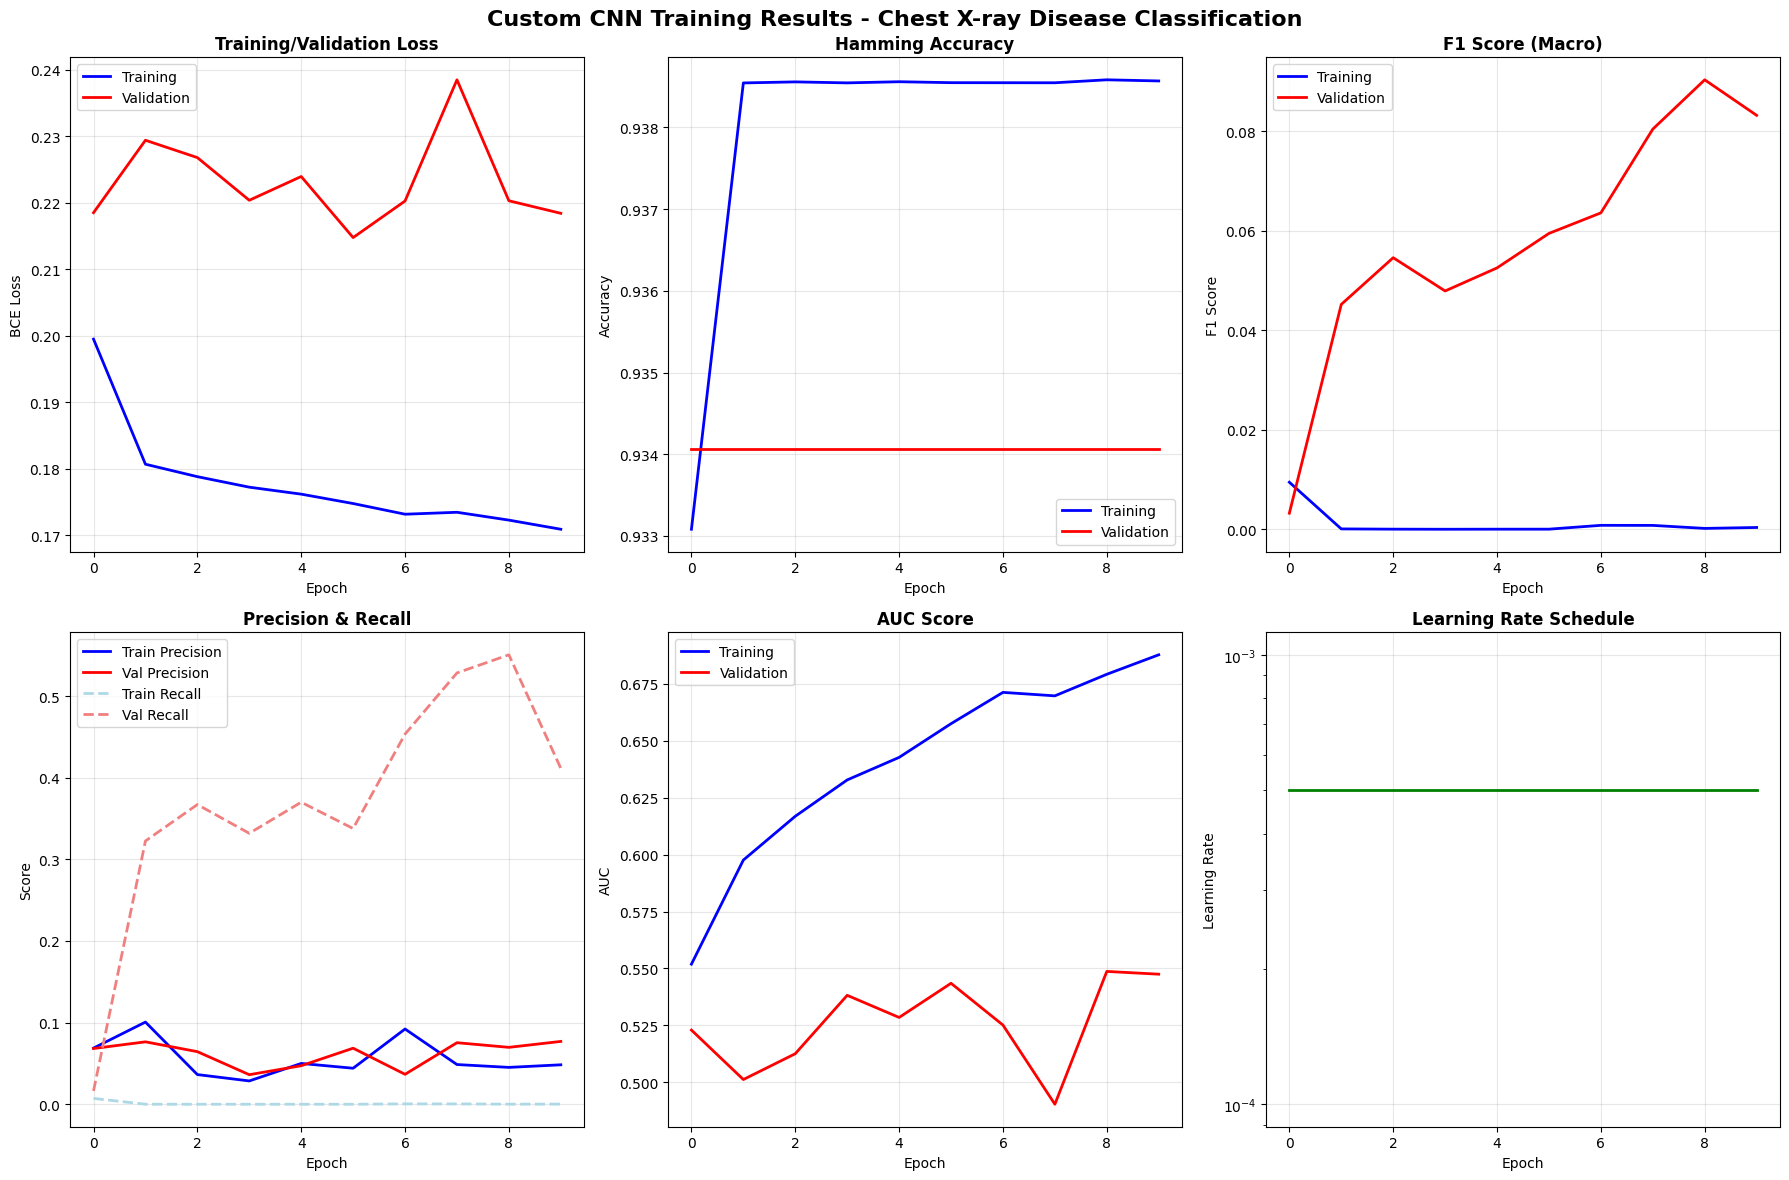

FINAL TRAINING SUMMARY
--------------------------------------------------------------------------------
 Model Performance:
  Best Validation Loss    : 0.2147
  Final Training Loss     : 0.1709
  Final Validation Loss   : 0.2184
  Final Val Hamming Acc   : 0.9341
  Final Val F1 Score      : 0.0832
  Final Val Precision     : 0.0770
  Final Val Recall        : 0.4115
  Final Val AUC           : 0.5475

Training Configuration:
  Model                   : Custom CNN
  Total Parameters        : 6,106,644
  Training Epochs         : 10
  Dataset Size            : 78,506 train / 12,533 val
  Batch Size              : 128
  Final Learning Rate     : 0.000500

Model Checkpoint:
Saved as: checkpoints/best_custom_cnn.pth


In [197]:
# Training Results Visualization and Summary
import matplotlib.pyplot as plt

print("Generating training results visualization")

# Create comprehensive training plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f'{active_model_name} Training Results - Chest X-ray Disease Classification',
             fontsize=16, fontweight='bold')

# 1. Loss curves
axes[0, 0].plot(train_losses, label='Training', color='blue', linewidth=2)
axes[0, 0].plot(validate_losses, label='Validation', color='red', linewidth=2)
axes[0, 0].set_title('Training/Validation Loss', fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('BCE Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Hamming Accuracy
axes[0, 1].plot(train_metrics_history['hamming_accuracy'], label='Training', color='blue', linewidth=2)
axes[0, 1].plot(validate_metrics_history['hamming_accuracy'], label='Validation', color='red', linewidth=2)
axes[0, 1].set_title('Hamming Accuracy', fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. F1 Score
axes[0, 2].plot(train_metrics_history['f1_score'], label='Training', color='blue', linewidth=2)
axes[0, 2].plot(validate_metrics_history['f1_score'], label='Validation', color='red', linewidth=2)
axes[0, 2].set_title('F1 Score (Macro)', fontweight='bold')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('F1 Score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Precision and Recall
axes[1, 0].plot(train_metrics_history['precision'], label='Train Precision', color='blue', linewidth=2)
axes[1, 0].plot(validate_metrics_history['precision'], label='Val Precision', color='red', linewidth=2)
axes[1, 0].plot(train_metrics_history['recall'], label='Train Recall', color='lightblue', linewidth=2, linestyle='--')
axes[1, 0].plot(validate_metrics_history['recall'], label='Val Recall', color='lightcoral', linewidth=2, linestyle='--')
axes[1, 0].set_title('Precision & Recall', fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. AUC Score
axes[1, 1].plot(train_metrics_history['auc'], label='Training', color='blue', linewidth=2)
axes[1, 1].plot(validate_metrics_history['auc'], label='Validation', color='red', linewidth=2)
axes[1, 1].set_title('AUC Score', fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('AUC')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Learning Rate Schedule
axes[1, 2].plot(learning_rates, color='green', linewidth=2)
axes[1, 2].set_title('Learning Rate Schedule', fontweight='bold')
axes[1, 2].set_xlabel('Epoch')
axes[1, 2].set_ylabel('Learning Rate')
axes[1, 2].set_yscale('log')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Training Summary

print("FINAL TRAINING SUMMARY")
print(f"{'-'*80}")

# Get final metrics
final_train_loss = train_losses[-1]
final_validate_loss = validate_losses[-1]
final_train_metrics = {k: v[-1] for k, v in train_metrics_history.items()}
final_validate_metrics = {k: v[-1] for k, v in validate_metrics_history.items()}

print(f" Model Performance:")
print(f"  Best Validation Loss    : {best_val_loss:.4f}")
print(f"  Final Training Loss     : {final_train_loss:.4f}")
print(f"  Final Validation Loss   : {final_validate_loss:.4f}")
print(f"  Final Val Hamming Acc   : {final_validate_metrics['hamming_accuracy']:.4f}")
print(f"  Final Val F1 Score      : {final_validate_metrics['f1_score']:.4f}")
print(f"  Final Val Precision     : {final_validate_metrics['precision']:.4f}")
print(f"  Final Val Recall        : {final_validate_metrics['recall']:.4f}")
print(f"  Final Val AUC           : {final_validate_metrics['auc']:.4f}")

print(f"\nTraining Configuration:")
print(f"  Model                   : {active_model_name}")
print(f"  Total Parameters        : {sum(p.numel() for p in active_model.parameters()):,}")
print(f"  Training Epochs         : {len(train_losses)}")
print(f"  Dataset Size            : {len(train_dataset):,} train / {len(val_dataset):,} val")
print(f"  Batch Size              : {batch_size}")
print(f"  Final Learning Rate     : {learning_rates[-1]:.6f}")

print(f"\nModel Checkpoint:")
checkpoint_name = f"best_{active_model_name.lower().replace(' ', '_').replace('-', '_')}.pth"
print(f"Saved as: checkpoints/{checkpoint_name}")


# Custom CNN Model Evaluation

Basic evaluation of the DenseNet model with Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.

Same code for the custom model evaluation

In [198]:
# Model Evaluation and Testing
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate model on test set
def model_evaluation(model, test_loader, device):
    model.eval()
    all_predictions = []
    all_targets = []

    print("Evaluating model on test set...")
    with torch.no_grad():
        for batch_idx, (images, targets) in enumerate(test_loader):
            images, targets = images.to(device), targets.to(device)

            # Get model predictions
            outputs = model(images)
            probabilities = torch.sigmoid(outputs)
            predictions = (probabilities >= 0.5).float()

            all_predictions.append(predictions.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

            if batch_idx % 10 == 0:
                print(f"Processing batch {batch_idx}/{len(test_loader)}")

    # Combine all predictions and targets
    y_pred = np.vstack(all_predictions)
    y_true = np.vstack(all_targets)

    return y_true, y_pred

# Run evaluation
print(f"Using model: {active_model.__class__.__name__}")
print(f"Model name: {active_model_name}")
print(f"Test set size: {len(test_dataset)} images")
print(f"Number of classes: {num_classes}")

y_true, y_pred = model_evaluation(active_model, test_loader, device)

print(f"Predictions shape: {y_pred.shape}")
print(f"Targets shape: {y_true.shape}")

Using model: CustomMultiLabelCNN
Model name: Custom CNN
Test set size: 21081 images
Number of classes: 20
Evaluating model on test set...


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Processing batch 0/165
Processing batch 10/165
Processing batch 20/165
Processing batch 30/165
Processing batch 40/165
Processing batch 50/165
Processing batch 60/165
Processing batch 70/165
Processing batch 80/165
Processing batch 90/165
Processing batch 100/165
Processing batch 110/165
Processing batch 120/165
Processing batch 130/165
Processing batch 140/165
Processing batch 150/165
Processing batch 160/165
Predictions shape: (21081, 20)
Targets shape: (21081, 20)


In [199]:
print("Calculating metrics")

# Accuracy (Hamming accuracy for multi-label)
hamming_accuracy = 1 - np.mean(np.not_equal(y_true, y_pred))

# Precision, Recall, F1 (macro average)
precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

# Display results
print(f"\nOVERALL PERFORMANCE:")
print(f"{'-'*80}")
print(f"Accuracy (Hamming):  {hamming_accuracy:.4f}")
print(f"Precision (Macro):   {precision:.4f}")
print(f"Recall (Macro):      {recall:.4f}")
print(f"F1-Score (Macro):    {f1:.4f}")

# Per-class metrics
print(f"\nPER-CLASS METRICS:")
print(f"{'Class':<20} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print(f"{'-'*60}")

class_names = label_columns
for i, class_name in enumerate(class_names):
    class_precision = precision_score(y_true[:, i], y_pred[:, i], zero_division=0)
    class_recall = recall_score(y_true[:, i], y_pred[:, i], zero_division=0)
    class_f1 = f1_score(y_true[:, i], y_pred[:, i], zero_division=0)

    print(f"{class_name:<20} {class_precision:<12.3f} {class_recall:<12.3f} {class_f1:<12.3f}")

print("\nMetrics calculation completed!")

Calculating metrics

OVERALL PERFORMANCE:
--------------------------------------------------------------------------------
Accuracy (Hamming):  0.9257
Precision (Macro):   0.0000
Recall (Macro):      0.0000
F1-Score (Macro):    0.0000

PER-CLASS METRICS:
Class                Precision    Recall       F1-Score    
------------------------------------------------------------
Atelectasis          0.000        0.000        0.000       
Cardiomegaly         0.000        0.000        0.000       
Consolidation        0.000        0.000        0.000       
Edema                0.000        0.000        0.000       
Effusion             0.000        0.000        0.000       
Emphysema            0.000        0.000        0.000       
Fibrosis             0.000        0.000        0.000       
Hernia               0.000        0.000        0.000       
Infiltration         0.000        0.000        0.000       
Mass                 0.000        0.000        0.000       
Nodule               0.0

In [200]:
# Confusion Matrix Visualization

# Overall confusion matrix statistics
print(f"\nCONFUSION MATRIX SUMMARY:")
print(f"{'-'*70}")
print(f"{'Class':<20} {'TN':<8} {'FP':<8} {'FN':<8} {'TP':<8}")
print(f"{'-'*70}")

for i, class_name in enumerate(class_names):
    cm = confusion_matrix(y_true[:, i], y_pred[:, i])
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
    else:
        # Handle cases where only one class is present
        if cm.shape == (1, 1):
            if np.all(y_true[:, i] == 0):  # Only negative examples
                tn, fp, fn, tp = cm[0, 0], 0, 0, 0
            else:  # Only positive examples
                tn, fp, fn, tp = 0, 0, 0, cm[0, 0]
        else:
            tn, fp, fn, tp = 0, 0, 0, 0

    print(f"{class_name:<20} {tn:<8d} {fp:<8d} {fn:<8d} {tp:<8d}")

print("\nConfusion matrix analysis completed!")


CONFUSION MATRIX SUMMARY:
----------------------------------------------------------------------
Class                TN       FP       FN       TP      
----------------------------------------------------------------------
Atelectasis          18381    0        2700     0       
Cardiomegaly         20213    0        868      0       
Consolidation        19584    0        1497     0       
Edema                20330    0        751      0       
Effusion             17346    0        3735     0       
Emphysema            20164    0        917      0       
Fibrosis             20716    0        365      0       
Hernia               21019    0        62       0       
Infiltration         15922    0        5159     0       
Mass                 19752    0        1329     0       
Nodule               19776    0        1305     0       
Pleural Thickening   20179    0        902      0       
Pneumonia            20629    0        452      0       
Pneumothorax         18975    0  

# Save Custom CNN Model to gcloud

In [120]:
!cp /content/checkpoints/best_custom_cnn.pth /content/drive/MyDrive/uni/code/Disease-Diagnosis-Deep-Learning/checkpoints